<a href="https://colab.research.google.com/github/Robotmcgregor/earth-analytics-python-env/blob/master/Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/raster-data-exercises/

## Challenge 1: Open And Plot Hillshade

In [3]:
pip install rasterio

     |████████████████████████████████| 18.2MB 1.3MB/s 


In [4]:
pip install earthpy


     |████████████████████████████████| 1.4MB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 972kB 18.2MB/s 
     |████████████████████████████████| 10.9MB 33.1MB/s 
     |████████████████████████████████| 14.7MB 313kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365087 sha256=52e367e2396e998fb3a74bca4802b760fbf93f754de00e717725dce28a67808b
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [5]:
pip install geopandas


In [15]:
#Import modules
import seaborn as sns
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import matplotlib.pyplot as plt

In [7]:
#Set seaborn styles
sns.set(font_scale=1.5, style="white")

In [1]:
path = ("/content/drive/My Drive/earth-analytics/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif")

In [8]:
with rio.open(path) as snc:
  DTH_hill = snc.read(1)

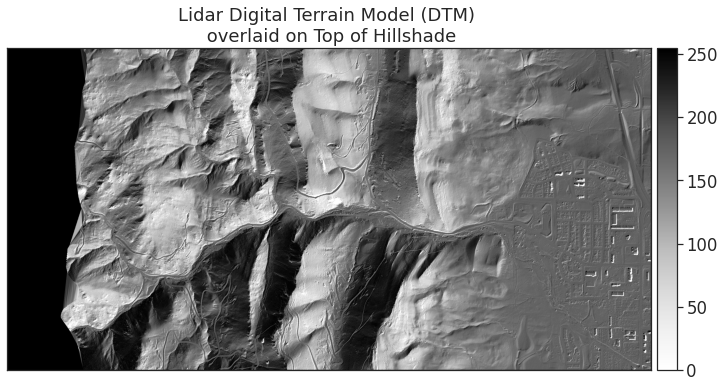

In [19]:
ep.plot_bands(DTH_hill,
              cmap="Greys",
              title="Lidar Digital Terrain Model (DTM) \n overlaid on Top of Hillshade")
plt.show()

In [24]:
DTM_path = ("/content/drive/My Drive/earth-analytics/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif")

In [28]:
with rio.open(DTM_path) as src:
  dtm_re_arr = src.read(1, masked=True)

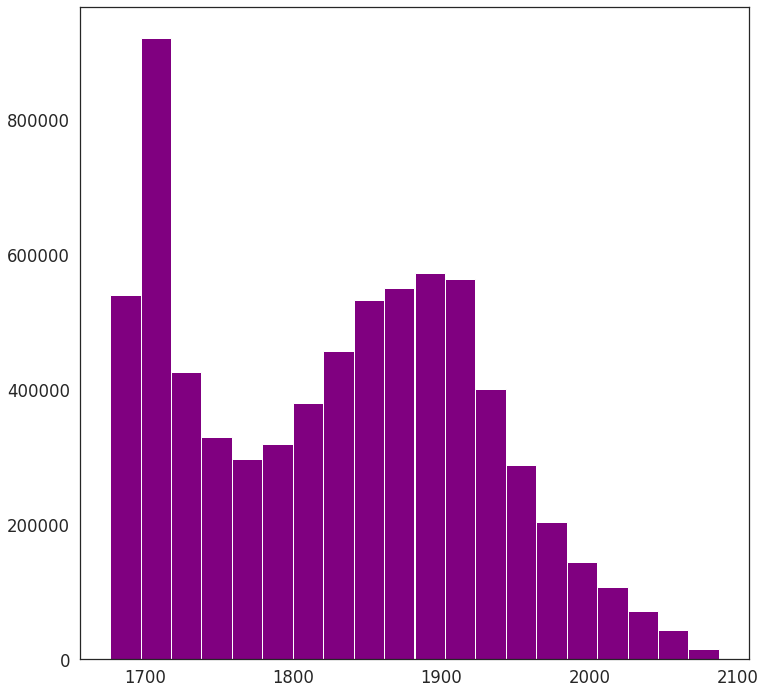

In [29]:
ep.hist(dtm_re_arr)
plt.show()

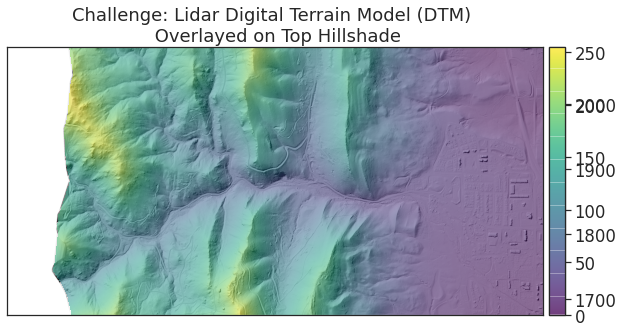

In [45]:
f, ax = plt.subplots(figsize=(10, 20))
ep.plot_bands(DTH_hill, ax =ax,
              title="Challenge: Lidar Digital Terrain Model (DTM) \n Overlayed on Top Hillshade")
ep.plot_bands(dtm_re_arr, 
              ax=ax,
              cmap="viridis",
              alpha=0.5)

plt.show()


#Challenge 3: Add a site boundary to the raster plot

In [59]:
with rio.open(DTM_path) as dtm_src:
  lidar_dtm_meta = dtm_src.read(1, masked=True)
  #create an object to store meadata
  lidar_dtm_meta = dtm_src.profile

print(lidar_dtm_meta)
print("CRS: ", dtm_src.bounds) 

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS.from_epsg(32613), 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
CRS:  BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)
